In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports and Utils

In [3]:
#collapse-show
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from tensorflow import keras

img_rows = 28
img_cols = 28
num_classes = 10
num_channels = 1

def prep_from_scratch(num_classes, image_shape, hidden_sizes, dropout_keep_probs):
    from keras.models import Sequential
    from keras.layers import Dense, Flatten, Conv2D, Dropout, InputLayer
    assert len(hidden_sizes) == len(dropout_keep_probs)
    nn = Sequential()
    # nn.add(Conv2D(24, kernel_size=(3, 3), strides=2,
    #                  activation='relu', 
    #                  input_shape=(img_rows, img_cols, num_channels)))
    # nn.add(Dropout(0.5))
    # nn.add(Conv2D(24, (3, 3), strides=2, activation='relu'))
    # nn.add(Dropout(0.5))
    # nn.add(Conv2D(24, (3, 3), activation='relu'))
    # nn.add(Dropout(0.5))
    nn.add(InputLayer(input_shape=image_shape))
    nn.add(Flatten())
    for size, keep_prob in zip(hidden_sizes, dropout_keep_probs):
      nn.add(Dense(size, 'relu'))
      if keep_prob > 0.0:
        nn.add(Dropout(keep_prob))
    
    nn.add(Dense(num_classes, activation='softmax'))
    nn.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    return nn

def prep_imgs(raw):
    num_images = raw.shape[0]
    out_x = raw.reshape(num_images, img_rows, img_cols, num_channels)
    out_x = out_x / 255
    return out_x

def prep_data(raw):  #, train_size, val_size):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    x = raw[:,1:]
    out_x = prep_imgs(x)
    return out_x, out_y

def from_one_hot_to_digit(one_hot):
    return np.argmax(one_hot)

# Data Perperation

In [4]:
test_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/kaggle/test.csv")
train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/kaggle/train.csv")
test_X = prep_imgs(np.array(test_data))
X,Y= prep_data(np.array(train_data))


# Examine Data

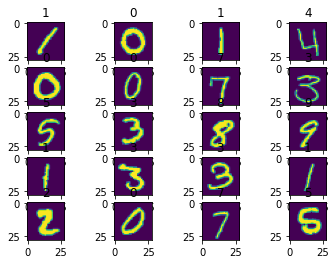

In [5]:
def examine_by_indices(imgs,labels,start_index, end_index):
  from matplotlib import pyplot as plt
  from math import ceil

  num_of_plots = end_index - start_index
  nrows=ceil(num_of_plots/4)
  ncols=4
  _,axs = plt.subplots(nrows=nrows,ncols=ncols)
  axs = axs.flatten()
  for img, ax, label in zip(imgs[start_index:end_index,:,:,0],axs, labels[start_index:end_index]):
    ax.set_title(from_one_hot_to_digit(label))
    ax.imshow(img)
  plt.show()


examine_by_indices(X,Y,0,20)

# Build Model

In [6]:
model = prep_from_scratch(num_classes,X[0,:,:,0].shape, [128, 64], [0.5, 0.5])  #prep_nn(5)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
__________________________________________________

In [8]:
history = model.fit(np.stack(X,axis=0),np.stack(Y,axis=0),
          batch_size=20,
          epochs=20,
          validation_split = 0.2,verbose=1)


# print(categorical_y.unique())

Epoch 1/20
1680/1680 [==============================] - 4s 2ms/step - loss: 0.1464 - accuracy: 0.9578 - val_loss: 0.1196 - val_accuracy: 0.9698
Epoch 2/20
1680/1680 [==============================] - 4s 2ms/step - loss: 0.1491 - accuracy: 0.9576 - val_loss: 0.1167 - val_accuracy: 0.9688
Epoch 3/20
1680/1680 [==============================] - 3s 2ms/step - loss: 0.1459 - accuracy: 0.9576 - val_loss: 0.1178 - val_accuracy: 0.9689
Epoch 4/20
1680/1680 [==============================] - 3s 2ms/step - loss: 0.1458 - accuracy: 0.9567 - val_loss: 0.1152 - val_accuracy: 0.9685
Epoch 5/20
1680/1680 [==============================] - 3s 2ms/step - loss: 0.1458 - accuracy: 0.9574 - val_loss: 0.1114 - val_accuracy: 0.9698
Epoch 6/20
1680/1680 [==============================] - 3s 2ms/step - loss: 0.1346 - accuracy: 0.9609 - val_loss: 0.1128 - val_accuracy: 0.9694
Epoch 7/20
1680/1680 [==============================] - 4s 2ms/step - loss: 0.1430 - accuracy: 0.9589 - val_loss: 0.1131 - val_accuracy:

# Plotting Training History

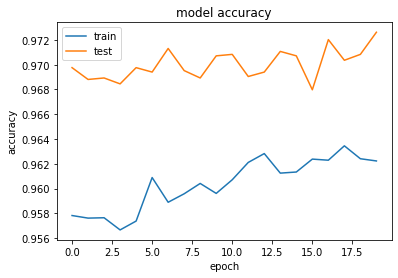

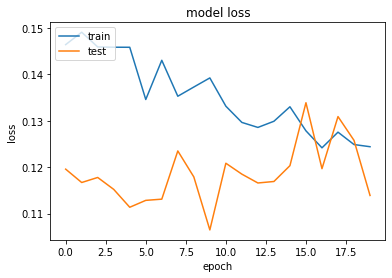

In [11]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

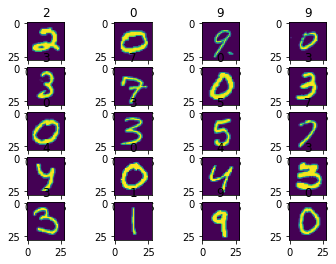

In [12]:
test_X = prep_imgs(np.array(test_data))
predictions = model.predict(test_X)
# print(predictions.shape)
# print(predictions[0:20])
examine_by_indices(test_X, predictions, 0,20)

As you can see, most of the images are classified correctly except the top right zero which is classified as 9. The training history plots do not look so well.

In [25]:
!git init drive/MyDrive/Colab\ Notebooks/kaggle

Initialized empty Git repository in /content/drive/MyDrive/Colab Notebooks/kaggle/.git/


In [26]:
!ls -a drive/MyDrive/Colab\ Notebooks/kaggle

'digits_recogniser - 1st visit  - No Convolutions.ipynb'   test.csv
 .git							   train.csv


In [35]:
!pwd
%cd drive/
!pwd

/content
/content/drive
/content/drive
